In [1]:
# Run Initial Preparation Notebook
# Run ML Preparation Notebook
%run app1_cust_seg_ml_prep.ipynb

Total Number of Duplicate Rows: 25876
ArrivalDateMonth: 12 unique values
Meal: 4 unique values
MarketSegment: 7 unique values
DistributionChannel: 4 unique values
ReservedRoomType: 7 unique values
AssignedRoomType: 8 unique values
DepositType: 3 unique values
CustomerType: 4 unique values
ReservationStatus: 3 unique values
['num__IsCanceled' 'num__LeadTime' 'num__ArrivalDateYear'
 'num__ArrivalDateMonth' 'num__ArrivalDateWeekNumber'
 'num__ArrivalDateDayOfMonth' 'num__StaysInWeekendNights'
 'num__StaysInWeekNights' 'num__Adults' 'num__Children' 'num__Babies'
 'num__Meal' 'num__MarketSegment' 'num__DistributionChannel'
 'num__IsRepeatedGuest' 'num__PreviousCancellations'
 'num__PreviousBookingsNotCanceled' 'num__ReservedRoomType'
 'num__AssignedRoomType' 'num__BookingChanges' 'num__DepositType'
 'num__Agent' 'num__Company' 'num__DaysInWaitingList' 'num__CustomerType'
 'num__ADR' 'num__RequiredCarParkingSpaces' 'num__TotalOfSpecialRequests'
 'num__ReservationStatus' 'num__ReservationStat

In [15]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

In [3]:
transformed_df  # Ready to Go Data

,num__IsCanceled,num__LeadTime,num__ArrivalDateYear,num__ArrivalDateMonth,num__ArrivalDateWeekNumber,num__ArrivalDateDayOfMonth,num__StaysInWeekendNights,num__StaysInWeekNights,num__Adults,num__Children,num__Babies,num__Meal,num__MarketSegment,num__DistributionChannel,num__IsRepeatedGuest,num__PreviousCancellations,num__PreviousBookingsNotCanceled,num__ReservedRoomType,num__AssignedRoomType,num__BookingChanges,num__DepositType,num__Agent,num__Company,num__DaysInWaitingList,num__CustomerType,num__ADR,num__RequiredCarParkingSpaces,num__TotalOfSpecialRequests,num__ReservationStatus,num__ReservationStatusYear,num__ReservationStatusMonth,num__ReservationStatusDay,num__TotalStay,num__SpendingPerPerson,num__GroupType,num__BookingUrgency,num__HighDemand,num__LoyaltyScore,num__ChildRatio,num__Occupancy,num__WaitingTimeCategory,num__CancellationRisk
0,-0.656114,-0.874411,-1.902984,0.185429,0.027139,-1.676536,-0.962296,-0.170768,-1.646194,-0.298667,-0.071574,1.163539,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.322338,-0.176568,-0.085664,-0.14545,-2.328143,-0.191229,-0.853375,0.573434,-1.879786,0.241861,-1.452015,-0.559220,-2.005682,-1.366705,1.189154,-0.45069,-0.101771,-0.30974,-0.597570,-0.11124,-0.061833
1,1.524125,0.124226,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,0.241861,-1.680519,0.420197,-0.714124,-0.094618,-1.018062,-0.45069,-0.101771,-0.30974,-0.597570,-0.11124,-0.061833
2,1.524125,-0.155879,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,-1.646194,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.905480,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,1.632780,0.420197,0.290421,-1.366705,-1.018062,-0.45069,-0.101771,-0.30974,-0.989074,-0.11124,-0.061833
3,1.524125,0.172940,-1.902984,0.185429,0.027139,-1.676536,1.248033,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,1.545586,-1.527907,-1.879786,-0.069373,0.833018,1.399613,-0.714124,-0.094618,-1.018062,2.21882,-0.101771,-0.30974,-0.858573,-0.11124,-0.061833
4,1.524125,0.270368,-1.902984,0.185429,0.027139,-1.562928,-0.962296,-0.170768,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,-1.566267,-0.559220,-0.714124,-0.094618,-1.018062,-0.45069,-0.101771,-0.30974,0.185439,-0.11124,-0.061833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53262,-0.656114,-0.667376,1.131434,0.510832,0.616286,1.618099,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,8.356016,-0.176568,-0.085664,-0.14545,-0.316749,-0.191229,-0.853375,0.573434,1.183060,0.864329,-1.109260,1.889321,-0.382540,-0.094618,1.189154,-0.45069,-0.101771,-0.30974,-0.933145,-0.11124,-0.061833
53263,-0.656114,0.294725,1.131434,0.510832,0.616286,1.731707,1.248033,1.718127,2.087745,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,1.923134,1.616124,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,2.388193,-0.191229,1.545586,0.573434,1.183060,0.864329,-0.995009,1.889321,0.531624,2.449557,-1.018062,2.21882,-0.101771,-0.30974,-0.709428,-0.11124,-0.061833
53264,-0.656114,-0.533413,1.131434,0.510832,0.616286,1.731707,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,0.601096

#### 1. Find Optimal K

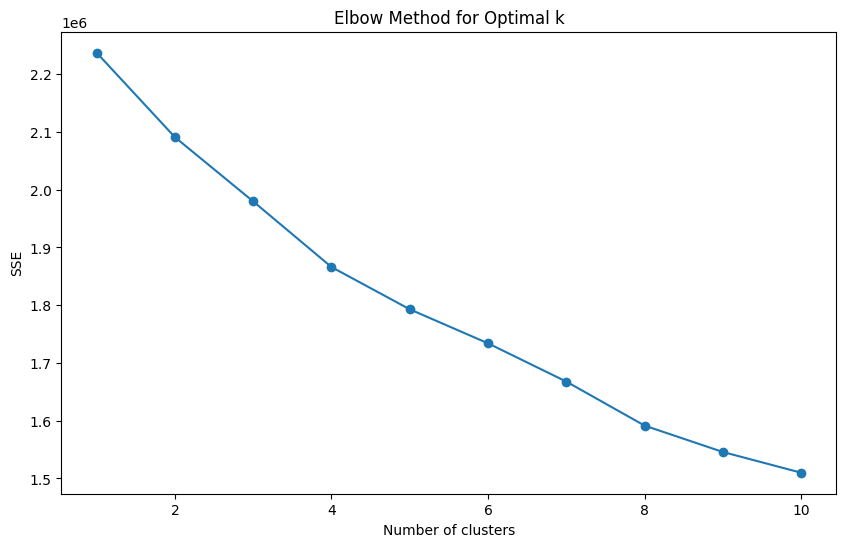

In [4]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

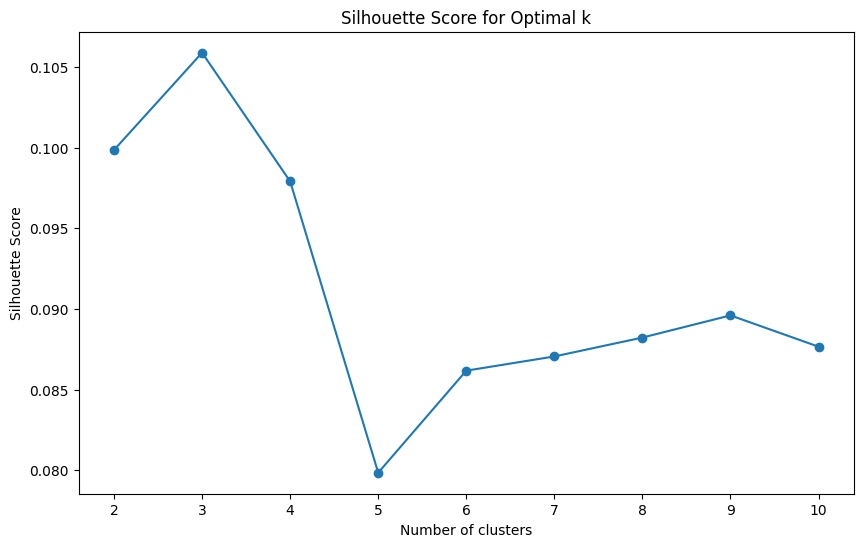

In [5]:
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df)
    score = silhouette_score(transformed_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

Although it seems like the elbow is at point 5, the Silhouette score has dropped significantly at 5. Choosing the Number of Cluster as **4** or **8** would be the best solution.

#### 2. Train the K-Means Model

- Train Kmeans with 9 Clusters

In [10]:
# KMeans with 4 clusters
kmeans = KMeans(n_clusters=9, random_state=42)

y_pred = kmeans.fit_predict(transformed_df)

In [11]:
# Add cluster labels to the original dataframe
transformed_df['Cluster'] = y_pred

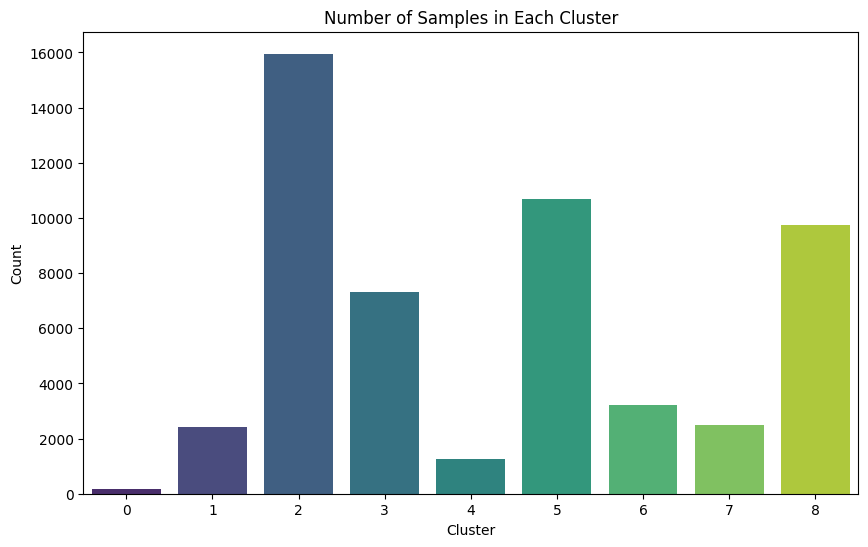

In [12]:
# Countplot for visualizing the number of samples in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

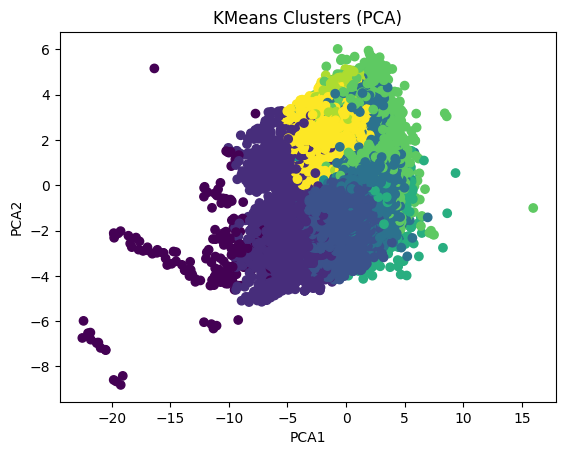

In [14]:
from sklearn.decomposition import PCA

# Dimensionally Reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df.drop('Cluster', axis=1))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [18]:
# Calculate silhouette score
silhouette_avg = silhouette_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

# Calculate noise ratio (assuming noise points are labeled as -1)
noise_ratio = (y_pred == -1).sum() / len(y_pred)
print(f'Noise Ratio: {noise_ratio}')

Silhouette Score: 0.08823659853343613
Davies-Bouldin Score: 2.170599219004262
Calinski-Harabasz Score: 2856.5107187634535
Noise Ratio: 0.0


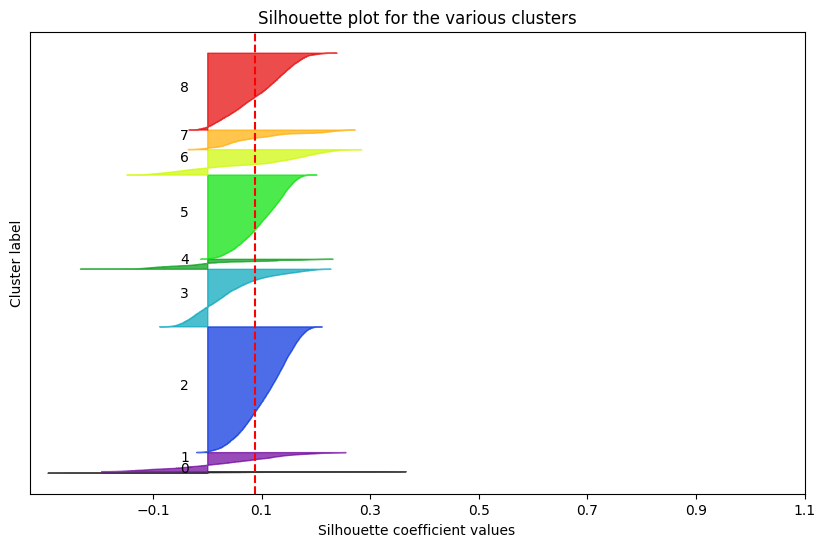

In [19]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(transformed_df.drop('Cluster', axis=1), y_pred)

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(9):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 9)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.show()

- Train Kmeans with 4 Clusters

In [20]:
# KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

y_pred = kmeans.fit_predict(transformed_df)

# Add cluster labels to the original dataframe
transformed_df['Cluster'] = y_pred

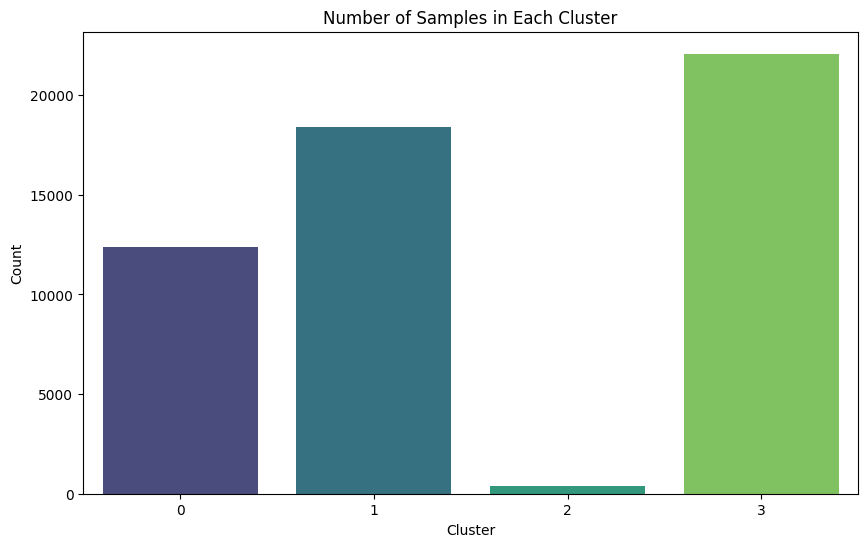

In [21]:
# Countplot for visualizing the number of samples in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

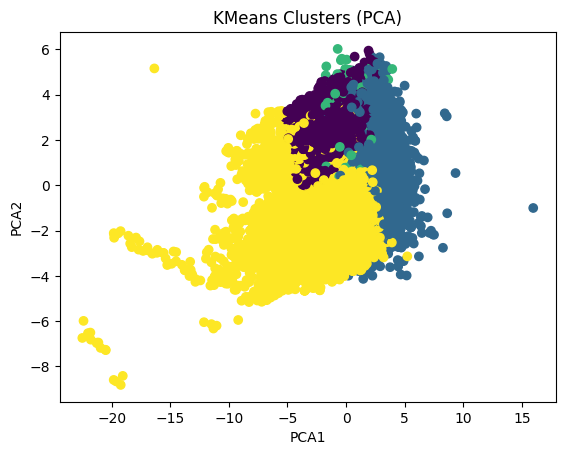

In [22]:
from sklearn.decomposition import PCA

# Dimensionally Reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df.drop('Cluster', axis=1))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [23]:
# Calculate silhouette score
silhouette_avg = silhouette_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

# Calculate noise ratio (assuming noise points are labeled as -1)
noise_ratio = (y_pred == -1).sum() / len(y_pred)
print(f'Noise Ratio: {noise_ratio}')

Silhouette Score: 0.06318393472503582
Davies-Bouldin Score: 2.71823396674416
Calinski-Harabasz Score: 2352.1129898605172
Noise Ratio: 0.0


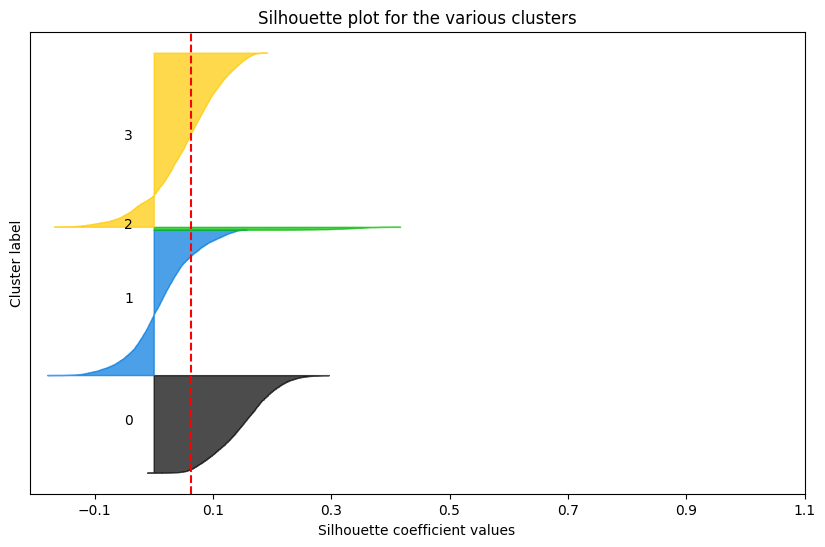

In [24]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(transformed_df.drop('Cluster', axis=1), y_pred)

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(4):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.show()

- Train Kmeans with 3 Clusters

In [25]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

y_pred = kmeans.fit_predict(transformed_df)

# Add cluster labels to the original dataframe
transformed_df['Cluster'] = y_pred

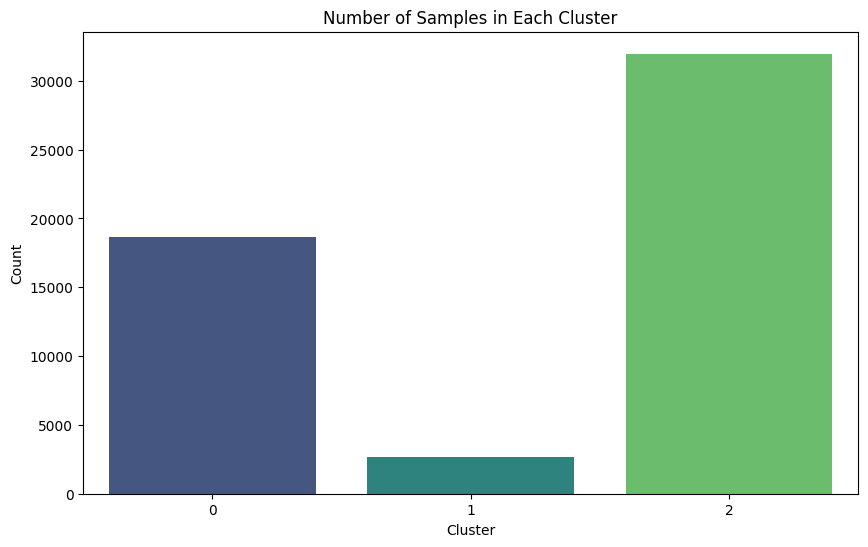

In [26]:
# Countplot for visualizing the number of samples in each cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

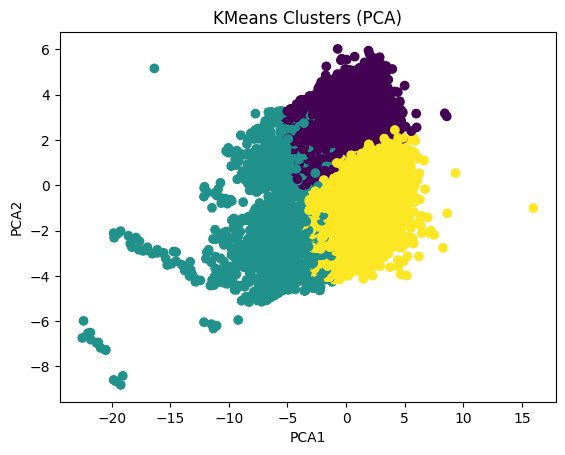

In [27]:
from sklearn.decomposition import PCA

# Dimensionally Reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df.drop('Cluster', axis=1))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [28]:
# Calculate silhouette score
silhouette_avg = silhouette_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(transformed_df.drop('Cluster', axis=1), y_pred)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

# Calculate noise ratio (assuming noise points are labeled as -1)
noise_ratio = (y_pred == -1).sum() / len(y_pred)
print(f'Noise Ratio: {noise_ratio}')

Silhouette Score: 0.09376749326825236
Davies-Bouldin Score: 2.776337082485425
Calinski-Harabasz Score: 3481.5461874328626
Noise Ratio: 0.0


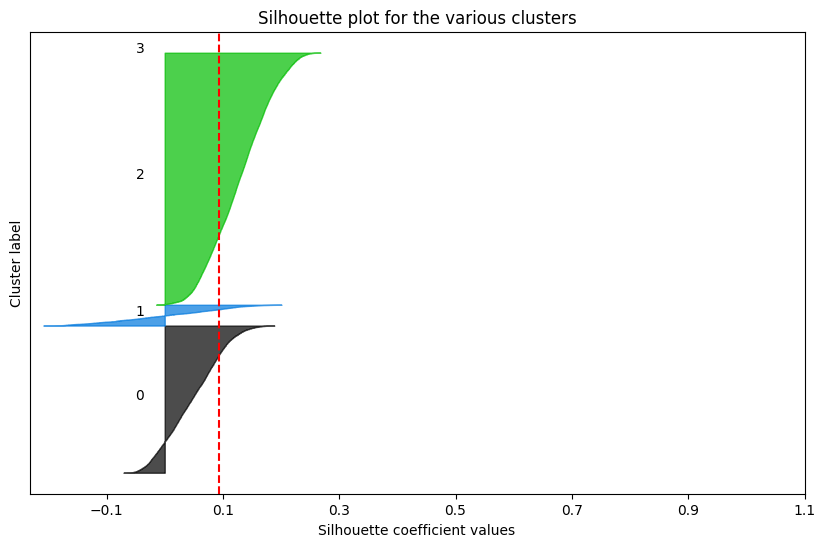

In [29]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(transformed_df.drop('Cluster', axis=1), y_pred)

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(4):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.show()